In [1]:
from annoy import AnnoyIndex
import pandas as pd
import numpy as np
import cv2
import sys  
sys.path.insert(0, '../')
import matplotlib.pyplot as plt
from bot.utils.color_extractor import ColorFeaturesExtractor, Mode
from bot.utils.BOVW_extractor import BOVWFeaturesExtractor
from bot.utils.hog_extractor import HogFeaturesExtractor
from bot.utils.retriever import Retriever
from bot.utils.utils import get_names_from_indexes
import tensorflow as tf
from skimage.io import imread
import pickle

# Create indexes

In [2]:
def create_index(features_path, index_dir_path, retrieval_mode, metric):
    # read features
    df_features = pd.read_csv(features_path, sep=',', header=None)
    # instantiate retriever
    retriever = Retriever(index_dir_path)
    # create index
    retriever.create_index(df_features, retrieval_mode=retrieval_mode, metric = metric)
#     return df_features

In [3]:
# # neural network features
create_index('../data/nn_features.csv', '../indexes/', 'neural_network', 'angular')

In [4]:
# neural network features pc
create_index('../data/nn_features_pca.csv', '../indexes/', 'neural_network_pca', 'angular')

In [5]:
# # color features
create_index('../data/color_features.csv', '../indexes/', 'color', 'euclidean')

In [6]:
# color features pca
create_index('../data/color_features_pca.csv', '../indexes/', 'color_pca', 'euclidean')

In [7]:
# # color features center subregions
create_index('../data/color_features_center_subregions.csv', '../indexes/', 'color_center_subregions', 'euclidean')

In [8]:
# color features center subregions pca
create_index('../data/color_features_center_subregions_pca.csv', '../indexes/', 'color_center_subregions_pca', 'euclidean')

In [9]:
# # BOVW features
# create_index('../data/BOVW_features.csv', '../indexes/', 'bovw', 'angular')

In [10]:
# # BOVW features pca
# create_index('../data/BOVW_features_pca.csv', '../indexes/', 'bovw_pca', 'angular')

In [11]:
# # HOG features
create_index('../data/hog_features.csv', '../indexes/', 'hog', 'euclidean')

In [12]:
# HOG features pca
create_index('../data/hog_features_pca.csv', '../indexes/', 'hog_pca', 'euclidean')

In [13]:
# # color + HOG features
# create_index('../data/merged_color_hog_features.csv', '../indexes/', 'color_hog', 'angular')

In [14]:
# color + HOG features with pca
create_index('../data/hog_color_features_pca.csv', '../indexes/', 'hog_color_pca', 'euclidean')

In [15]:
# # color + HOG features with pca and standardization
# create_index('../data/merged_color_hog_pca_std.csv', '../indexes/', 'color_hog_pca_std', 'angular')

# Test retrieval

In [16]:
# utils
def show_images(idx, names_df, img_path):
    # plot starting image
    img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.imshow(img_rgb)
    plt.show()
    # extract names
    names = names_df.loc[idx,'name'].values
    # prepare plot
    n_elements = len(names)
    fig, ax = plt.subplots(1,n_elements,figsize=(12,6))
    for i in range(0,n_elements):
        tmp = cv2.imread('../data/train/' + names[i])
        tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
        ax[i].imshow(tmp)
    plt.show()
    return names

def loadimg(img_path):

    im = tf.keras.preprocessing.image.load_img(
        img_path,
        target_size=(300, 300, 3)
    )
    imarr = tf.keras.preprocessing.image.img_to_array(im)
    imarr = tf.keras.applications.efficientnet.preprocess_input(imarr)
    return np.array([imarr])




In [17]:
# instantiate retriever
retriever = Retriever('../indexes/', load_all=True)
# choose image
img_path = '../test_imgs/yellow.jpg'
# settings
n_neighbours = 10

loading neural_network ...
loading neural_network_pca ...
loading color ...
loading color_pca ...
loading color_center_subregions ...
loading color_center_subregions_pca ...
loading hog ...
loading hog_pca ...
loading hog_color_pca ...


## Neural network

In [18]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [19]:
# read model
model = tf.keras.models.load_model('../data/model.h5')

In [20]:
# NN
img_features_nn = model.predict(loadimg(img_path))[1][0]

In [21]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_nn, retrieval_mode='neural_network', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [22]:
distances

[0.6480148434638977,
 0.6523189544677734,
 0.654655396938324,
 0.6611288189888,
 0.664734959602356,
 0.6697573661804199,
 0.671238899230957,
 0.671238899230957,
 0.6817541718482971,
 0.7131113409996033]

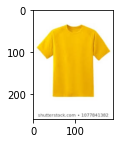

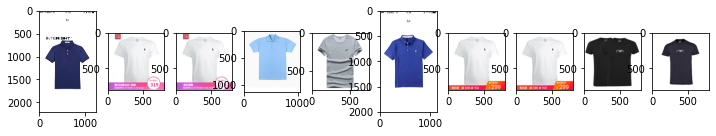

array(['5689.jpg', '5527.jpg', '5525.jpg', '494.jpg', '8279.jpg',
       '6506.jpg', '5522.jpg', '5523.jpg', '6154.jpg', '252.jpg'],
      dtype=object)

In [23]:
# show retrieval results
show_images(indexes, df_names, img_path)


## Neural network PCA

In [24]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [25]:
# read model
model = tf.keras.models.load_model('../data/model.h5')

In [26]:
# NN
img_features_nn = model.predict(loadimg(img_path))[1][0]
# read pca model
with open('../data/pca_nn.pckl', 'rb') as handle:
                    pca_nn = pickle.load(handle)
# apply pca
img_features_nn_pca = pca_nn.transform([img_features_nn])[0]

In [27]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_nn_pca, retrieval_mode='neural_network_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [28]:
distances

[0.3790559470653534,
 0.38836705684661865,
 0.3937761187553406,
 0.3956080973148346,
 0.397865355014801,
 0.4131811857223511,
 0.41786667704582214,
 0.4234454035758972,
 0.4234454035758972,
 0.4356343746185303]

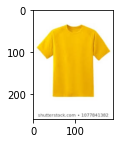

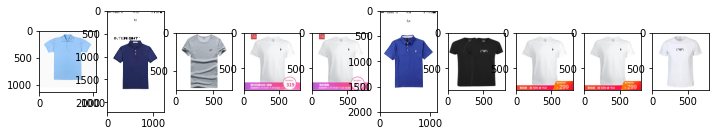

array(['494.jpg', '5689.jpg', '8279.jpg', '5527.jpg', '5525.jpg',
       '6506.jpg', '6154.jpg', '5522.jpg', '5523.jpg', '2529.jpg'],
      dtype=object)

In [29]:
# show retrieval results
show_images(indexes, df_names, img_path)


## Color

In [30]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [31]:
# color extractor
features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
img_features_color = features_extractor.extract(cv2.imread(img_path), Mode.CENTER_ONLY)

In [32]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_color, retrieval_mode='color', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [33]:
distances

[0.604490339756012,
 0.9627994894981384,
 1.3210176229476929,
 1.3418312072753906,
 1.3581470251083374,
 1.364155888557434,
 1.3719422817230225,
 1.375055193901062,
 1.376952052116394,
 1.3819903135299683]

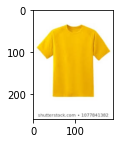

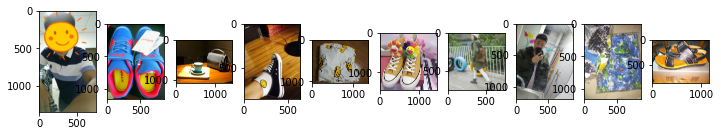

array(['3293.jpg', '23176.jpg', '29710.jpg', '20211.jpg', '3102.jpg',
       '18734.jpg', '26508.jpg', '1039.jpg', '10322.jpg', '20510.jpg'],
      dtype=object)

In [34]:
# show retrieval results
show_images(indexes, df_names, img_path)

## Color PCA

In [35]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [36]:
# color extractor
features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
img_features_color = features_extractor.extract(cv2.imread(img_path), Mode.CENTER_ONLY)
# read pca model
with open('../data/pca_color.pckl', 'rb') as handle:
                    pca_color = pickle.load(handle)
# apply pca
img_features_color_pca = pca_color.transform([img_features_color])[0]

In [37]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_color_pca, retrieval_mode='color_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [38]:
distances

[0.11792625486850739,
 0.11895647644996643,
 0.11958745121955872,
 0.11995923519134521,
 0.12047932296991348,
 0.12102765589952469,
 0.12146838754415512,
 0.12178930640220642,
 0.12197253108024597,
 0.12438338249921799]

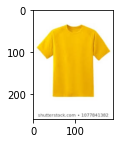

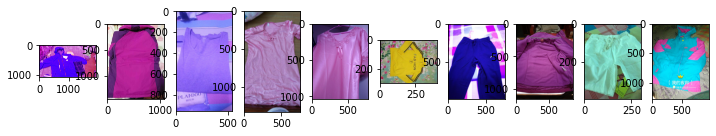

array(['2266.jpg', '4125.jpg', '2795.jpg', '4877.jpg', '4869.jpg',
       '4737.jpg', '9313.jpg', '4133.jpg', '7837.jpg', '3397.jpg'],
      dtype=object)

In [39]:
# show retrieval results
show_images(indexes, df_names, img_path)

## Color center subregions

In [40]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [41]:
# color extractor
features_extractor = ColorFeaturesExtractor((16, 18, 2), 0.6)
img_features_color = features_extractor.extract(cv2.imread(img_path), Mode.CENTER_SUBREGIONS)

In [42]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_color, retrieval_mode='color_center_subregions', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [43]:
distances

[0.916898787021637,
 0.9403245449066162,
 1.0540589094161987,
 1.1497076749801636,
 1.1635907888412476,
 1.1665412187576294,
 1.2164223194122314,
 1.2369115352630615,
 1.296028971672058,
 1.3183369636535645]

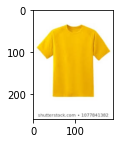

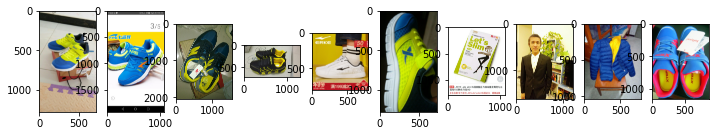

array(['25977.jpg', '18521.jpg', '22499.jpg', '16910.jpg', '25328.jpg',
       '16580.jpg', '1620.jpg', '3604.jpg', '2115.jpg', '23176.jpg'],
      dtype=object)

In [44]:
# show retrieval results
show_images(indexes, df_names, img_path)

## Color center subregions PCA

In [45]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [46]:
# color extractor
features_extractor = ColorFeaturesExtractor((16, 18, 2), 0.6)
img_features_color = features_extractor.extract(cv2.imread(img_path), Mode.CENTER_SUBREGIONS)
# read pca model
with open('../data/pca_color_center_subregions.pckl', 'rb') as handle:
                    pca_color_center_subregions = pickle.load(handle)
# apply pca
img_features_color_pca = pca_color_center_subregions.transform([img_features_color])[0]

In [47]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_color_pca, retrieval_mode='color_center_subregions_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [48]:
distances

[0.13545405864715576,
 0.13980351388454437,
 0.14044129848480225,
 0.14050519466400146,
 0.14146094024181366,
 0.1446922868490219,
 0.154966339468956,
 0.16600212454795837,
 0.16834206879138947,
 0.17040638625621796]

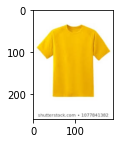

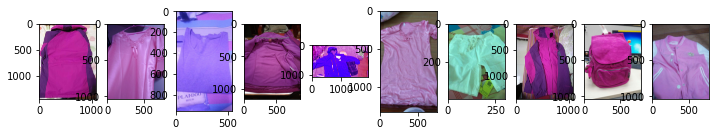

array(['4125.jpg', '4869.jpg', '2795.jpg', '4133.jpg', '2266.jpg',
       '4877.jpg', '7837.jpg', '4127.jpg', '31966.jpg', '5814.jpg'],
      dtype=object)

In [49]:
# show retrieval results
show_images(indexes, df_names, img_path)

## HOG

In [50]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [51]:
# HOG extractor
features_extractor = HogFeaturesExtractor()
img_features_hog = features_extractor.extract(imread(img_path))

In [52]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_hog, retrieval_mode='hog', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [53]:
distances

[0.7766691446304321,
 0.8440982103347778,
 0.8807140588760376,
 0.8828353881835938,
 0.8872939348220825,
 0.8910411596298218,
 0.8910411596298218,
 0.893100380897522,
 0.8952437043190002,
 0.8952437043190002]

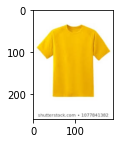

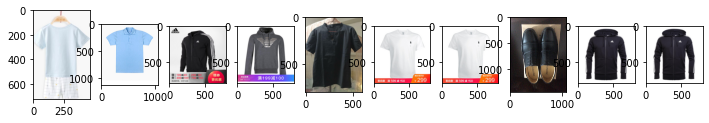

array(['4154.jpg', '494.jpg', '2955.jpg', '12.jpg', '7386.jpg',
       '5522.jpg', '5523.jpg', '27028.jpg', '2960.jpg', '2961.jpg'],
      dtype=object)

In [54]:
# show retrieval results
show_images(indexes, df_names, img_path)

## HOG PCA

In [55]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/rpo.jpg'

In [56]:
# HOG extractor
features_extractor = HogFeaturesExtractor()
img_features_hog = features_extractor.extract(imread(img_path))
# read pca model
with open('../data/pca_hog.pckl', 'rb') as handle:
                    pca_hog = pickle.load(handle)
# apply pca
img_features_hog_pca = pca_hog.transform([img_features_hog])[0]

In [57]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_hog_pca, retrieval_mode='hog_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [58]:
distances

[0.7973064184188843,
 0.8011482954025269,
 0.8330610394477844,
 0.8491390347480774,
 0.8618540167808533,
 0.8688049912452698,
 0.871667742729187,
 0.8717419505119324,
 0.8737940192222595,
 0.8827937245368958]

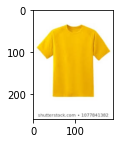

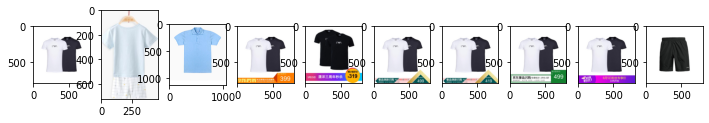

array(['2715.jpg', '4154.jpg', '494.jpg', '2718.jpg', '2221.jpg',
       '250.jpg', '2728.jpg', '2720.jpg', '2726.jpg', '10044.jpg'],
      dtype=object)

In [59]:
# show retrieval results
show_images(indexes, df_names, img_path)

## Color + HOG pca

In [60]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/rpo.jpg'

In [61]:
# extractors
hog_features_extractor = HogFeaturesExtractor()
color_features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
# extract features
img_features_hog = hog_features_extractor.extract(imread(img_path))
img_features_color = color_features_extractor.extract(cv2.imread(img_path), Mode.CENTER_ONLY)
# read pca models
with open('../data/pca_hc_hog.pckl', 'rb') as handle:
                    pca_hc_hog = pickle.load(handle)
with open('../data/pca_hc_color.pckl', 'rb') as handle:
                    pca_hc_color = pickle.load(handle)
# apply pca
img_features_hog_pca = pca_hc_hog.transform([img_features_hog])[0]
img_features_color_pca = pca_hc_color.transform([img_features_color])[0]
# merge features
img_features_merged_pca = np.hstack([img_features_hog_pca, img_features_color_pca])

In [62]:
img_features_merged_pca.shape

(300,)

In [63]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_merged_pca, retrieval_mode='hog_color_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [64]:
distances

[0.8054220080375671,
 0.814747154712677,
 0.8353062272071838,
 0.8623279929161072,
 0.8626967072486877,
 0.8773655295372009,
 0.8791273832321167,
 0.879330575466156,
 0.879330575466156,
 0.879330575466156]

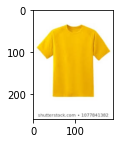

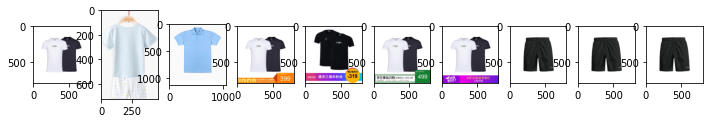

array(['2715.jpg', '4154.jpg', '494.jpg', '2718.jpg', '2221.jpg',
       '2720.jpg', '2726.jpg', '10044.jpg', '11973.jpg', '14696.jpg'],
      dtype=object)

In [65]:
# show retrieval results
show_images(indexes, df_names, img_path)

# Test delete

In [66]:
# test delete index
retriever.delete_index('replace_value')

## Color + HOG (OLD)

In [67]:
# # read images names
# df_names = pd.read_csv('../data/retrieval_base.csv')
# # choose img
# img_path = '../test_imgs/tshirt.jpg'

In [68]:
# # extractors
# hog_features_extractor = HogFeaturesExtractor()
# color_features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
# # extract features
# img_features_hog = hog_features_extractor.extract(imread(img_path))
# img_features_color = color_features_extractor.extract(cv2.imread(img_path), center_only=True)
# # merge features
# img_features_merged = np.concatenate((img_features_hog, img_features_color))

In [69]:
# # retrieve images
# (indexes, distances) = retriever.retrieve(img_features_merged, retrieval_mode='color_hog', n_neighbours=5, include_distances=True)

In [70]:
# distances

In [71]:
# # show retrieval results
# show_images(indexes, df_names)

## Color + HOG pca and standardization (OLD)

In [72]:
# # read images names
# df_names = pd.read_csv('../data/retrieval_base.csv')
# # choose img
# img_path = '../test_imgs/rpo.jpg'
# img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
# plt.imshow(img_rgb)

In [73]:
# # extractors
# hog_features_extractor = HogFeaturesExtractor()
# color_features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
# # extract features
# img_features_hog = hog_features_extractor.extract(imread(img_path))
# img_features_color = color_features_extractor.extract(cv2.imread(img_path), center_only=True)
# # merge features
# img_features_merged = np.concatenate((img_features_hog, img_features_color))
# # read and apply scaler
# with open('../data/scaler_std.pckl', 'rb') as handle:
#                     scaler = pickle.load(handle)
# img_features_merged = scaler.transform([img_features_merged])
# # read and apply pca model
# with open('../data/pca_std.pckl', 'rb') as handle:
#                     pca = pickle.load(handle)
# # apply pca
# img_features_merged_pca = pca.transform(img_features_merged)[0]

In [74]:
# img_features_merged_pca.shape

In [75]:
# # retrieve images
# (indexes, distances) = retriever.retrieve(img_features_merged_pca, retrieval_mode='color_hog_pca_std', n_neighbours=5, include_distances=True)

In [76]:
distances

[0.8054220080375671,
 0.814747154712677,
 0.8353062272071838,
 0.8623279929161072,
 0.8626967072486877,
 0.8773655295372009,
 0.8791273832321167,
 0.879330575466156,
 0.879330575466156,
 0.879330575466156]

In [77]:
# # show retrieval results
# show_images(indexes, df_names)

## BOVW (OLD)

In [78]:
# # read images names
# df_names = pd.read_csv('../data/retrieval_base.csv')
# # choose img
# img_path = '../test_imgs/tshirt.jpg'
# img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
# plt.imshow(img_rgb)

In [79]:
# # BOVW extractor
# features_extractor = BOVWFeaturesExtractor('../data/')
# img_features_bovw = features_extractor.extract(cv2.imread(img_path))

In [80]:
# # retrieve images
# (indexes, distances) = retriever.retrieve(img_features_bovw, retrieval_mode='bovw', n_neighbours=5, include_distances=True)

In [81]:
# distances

In [82]:
# # show retrieval results
# show_images(indexes, df_names)